# Naive Mean-Field approximation

In this section, we show the performance of Naive Mean-Field approximation (nMF) in inferring couplings $W_{ij}$. We will see that nMF method can produce a good result prediction in the regimes of large sample sizes and small coupling variance.  

Similary, we import the packages to the notebook:

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import simulate
import inference
%matplotlib inline

np.random.seed(1)

We first consider a system of $N = 100$ variables, coupling variance parameter $g = 2.0$

In [2]:
# parameter setting:
n = 100    # number of variables
g = 2.0    # coupling variance
w0 = np.random.normal(0.0,g/np.sqrt(n),size=(n,n))

Data length $L=2000$ is used as the first test.

In [3]:
l = 2000
s = simulate.generate_data(w0,l)

We apply nMF method to recover the coupling matrix from variable configurations.

In [4]:
w = inference.nmf(s)

We plot the heat map of predicted coupling matrix `W` and compare with the actual couplings `W0`:

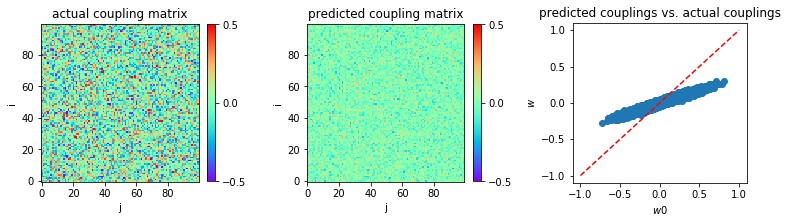

In [5]:
plt.figure(figsize=(11,3.2))

plt.subplot2grid((1,3),(0,0))
plt.title('actual coupling matrix')
plt.imshow(w0,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,3),(0,1))
plt.title('predicted coupling matrix')
plt.imshow(w,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,3),(0,2))
plt.title('predicted couplings vs. actual couplings')
plt.plot([-1,1],[-1,1],'r--')
plt.scatter(w0,w)
plt.xlabel('$w0$')
plt.ylabel('$w$')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

The mean square error between actual couplings and predicted couplings is calculated:

In [6]:
MSE = np.mean((w-w0)**2)
print('MSE:',MSE)

('MSE:', 0.016432507950391948)


Now, if we use a very larger sample size, $L=100000$ for instance.

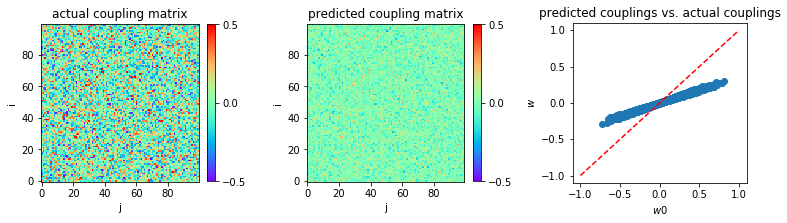

In [7]:
l = 100000
s = simulate.generate_data(w0,l)
w = inference.nmf(s)

plt.figure(figsize=(11,3.2))

plt.subplot2grid((1,3),(0,0))
plt.title('actual coupling matrix')
plt.imshow(w0,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,3),(0,1))
plt.title('predicted coupling matrix')
plt.imshow(w,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,3),(0,2))
plt.title('predicted couplings vs. actual couplings')
plt.plot([-1,1],[-1,1],'r--')
plt.scatter(w0,w)
plt.xlabel('$w0$')
plt.ylabel('$w$')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

In [8]:
MSE = np.mean((w-w0)**2)
print('MSE:',MSE)

('MSE:', 0.016114338928562788)


Now, let us consider small coupling variance, $g = 0.5$ for instance. Data length $L=2000$.

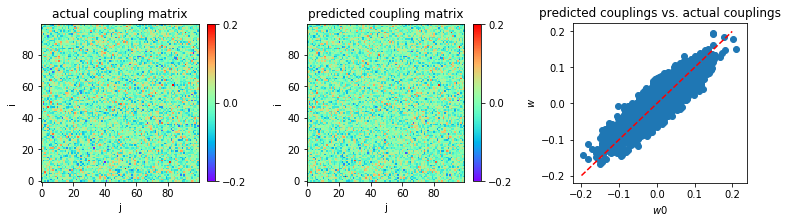

In [9]:
g = 0.5
w0 = np.random.normal(0.0,g/np.sqrt(n),size=(n,n))

l = 2000
s = simulate.generate_data(w0,l)
w = inference.nmf(s)

plt.figure(figsize=(11,3.2))

plt.subplot2grid((1,3),(0,0))
plt.title('actual coupling matrix')
plt.imshow(w0,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.2,0.2)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.2,0,0.2])

plt.subplot2grid((1,3),(0,1))
plt.title('predicted coupling matrix')
plt.imshow(w,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.2,0.2)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.2,0,0.2])

plt.subplot2grid((1,3),(0,2))
plt.title('predicted couplings vs. actual couplings')
plt.plot([-0.2,0.2],[-0.2,0.2],'r--')
plt.scatter(w0,w)
plt.xlabel('$w0$')
plt.ylabel('$w$')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

In [10]:
MSE = np.mean((w-w0)**2)
print('MSE:',MSE)

('MSE:', 0.0005299059905942844)


For very larger data length $L=100000$.

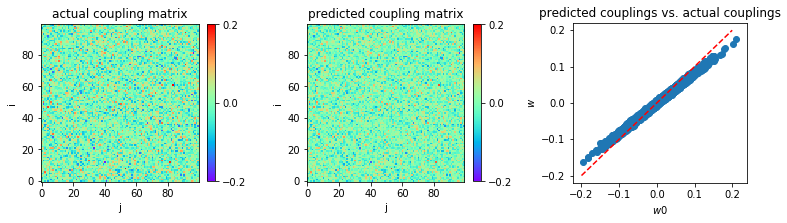

In [11]:
l = 100000
s = simulate.generate_data(w0,l)
w = inference.nmf(s)

plt.figure(figsize=(11,3.2))

plt.subplot2grid((1,3),(0,0))
plt.title('actual coupling matrix')
plt.imshow(w0,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.2,0.2)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.2,0,0.2])

plt.subplot2grid((1,3),(0,1))
plt.title('predicted coupling matrix')
plt.imshow(w,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.2,0.2)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.2,0,0.2])

plt.subplot2grid((1,3),(0,2))
plt.title('predicted couplings vs. actual couplings')
plt.plot([-0.2,0.2],[-0.2,0.2],'r--')
plt.scatter(w0,w)
plt.xlabel('$w0$')
plt.ylabel('$w$')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

So nMF works well only in the limit of large sample sizes and small coupling variance.